In [142]:



# Import dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
from scipy.stats import norm
import statsmodels.api as sm
from datetime import datetime
import requests
from io import BytesIO
from statsmodels.tsa.statespace.sarimax import SARIMAXResults










In [143]:
data=pd.read_csv("MachineLearning.csv")

In [144]:
data

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies,predicted_vacancies
0,547960,2015-01-01,Quebec,101,"Total, all occupations","Type of work, all types",60480.0,NaN
1,547963,2015-01-01,Quebec,101,"Total, all occupations",Full-time,45455.0,NaN
2,876736,2015-01-01,Saskatchewan,101,"Total, all occupations","Type of work, all types",14330.0,NaN
3,876739,2015-01-01,Saskatchewan,101,"Total, all occupations",Full-time,10420.0,NaN
4,1534288,2015-04-01,Canada,101,"Total, all occupations","Type of work, all types",452315.0,NaN
...,...,...,...,...,...,...,...,...
10704,55124776,2024-04-01,Nunavut,101,"Total, all occupations","Type of work, all types",575.0,NaN
10705,55124779,2024-04-01,Nunavut,101,"Total, all occupations",Full-time,455.0,NaN
10706,55181035,2024-04-01,Nunavut,6,Sales and service occupations,"Type of work, all types",135.0,NaN
10707,55181038,2024-04-01,Nunavut,6,Sales and service occupations,Full-time,95.0,NaN


In [145]:
# slicing for 'Canada'
ts_data= data
ts_data= data.loc[data['geo']=='Canada',:]

ts_data.head()

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies,predicted_vacancies
4,1534288,2015-04-01,Canada,101,"Total, all occupations","Type of work, all types",452315.0,NaN
5,1534291,2015-04-01,Canada,101,"Total, all occupations",Full-time,322625.0,NaN
6,1534294,2015-04-01,Canada,101,"Total, all occupations",Part-time,129690.0,NaN
7,1534421,2015-04-01,Canada,0,Legislative and senior management occupations,"Type of work, all types",855.0,NaN
8,1534424,2015-04-01,Canada,0,Legislative and senior management occupations,Full-time,830.0,NaN


In [146]:
# slicing for 'Total, all occupations' in NOC
ts_data= ts_data.loc[ts_data['noc_desc']=='Total, all occupations',:]
ts_data.head()

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies,predicted_vacancies
4,1534288,2015-04-01,Canada,101,"Total, all occupations","Type of work, all types",452315.0,NaN
5,1534291,2015-04-01,Canada,101,"Total, all occupations",Full-time,322625.0,NaN
6,1534294,2015-04-01,Canada,101,"Total, all occupations",Part-time,129690.0,NaN
290,3068576,2015-07-01,Canada,101,"Total, all occupations","Type of work, all types",409650.0,NaN
291,3068579,2015-07-01,Canada,101,"Total, all occupations",Full-time,271910.0,NaN


In [147]:
# slicing for 'Total, all occupations' in job_char
ts_data= ts_data.loc[ts_data['job_char']=='Type of work, all types',:]

ts_data.head()

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies,predicted_vacancies
4,1534288,2015-04-01,Canada,101,"Total, all occupations","Type of work, all types",452315.0,NaN
290,3068576,2015-07-01,Canada,101,"Total, all occupations","Type of work, all types",409650.0,NaN
573,4602864,2015-10-01,Canada,101,"Total, all occupations","Type of work, all types",359080.0,NaN
866,6137152,2016-01-01,Canada,101,"Total, all occupations","Type of work, all types",331520.0,NaN
1154,7671440,2016-04-01,Canada,101,"Total, all occupations","Type of work, all types",392420.0,NaN


In [148]:
df= ts_data
df

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies,predicted_vacancies
4,1534288,2015-04-01,Canada,101,"Total, all occupations","Type of work, all types",452315.0,NaN
290,3068576,2015-07-01,Canada,101,"Total, all occupations","Type of work, all types",409650.0,NaN
573,4602864,2015-10-01,Canada,101,"Total, all occupations","Type of work, all types",359080.0,NaN
866,6137152,2016-01-01,Canada,101,"Total, all occupations","Type of work, all types",331520.0,NaN
1154,7671440,2016-04-01,Canada,101,"Total, all occupations","Type of work, all types",392420.0,NaN
1459,9205728,2016-07-01,Canada,101,"Total, all occupations","Type of work, all types",406125.0,NaN
1755,10740016,2016-10-01,Canada,101,"Total, all occupations","Type of work, all types",382405.0,NaN
2057,12274304,2017-01-01,Canada,101,"Total, all occupations","Type of work, all types",388435.0,NaN
2355,13808592,2017-04-01,Canada,101,"Total, all occupations","Type of work, all types",461345.0,NaN
2660,15342880,2017-07-01,Canada,101,"Total, all occupations","Type of work, all types",469220.0,NaN


In [149]:
# remove unnecessary columns
df=df.loc[:, ['ref_date','total_vacancies']]
df

,ref_date,total_vacancies
4,2015-04-01,452315.0
290,2015-07-01,409650.0
573,2015-10-01,359080.0
866,2016-01-01,331520.0
1154,2016-04-01,392420.0
1459,2016-07-01,406125.0
1755,2016-10-01,382405.0
2057,2017-01-01,388435.0
2355,2017-04-01,461345.0
2660,2017-07-01,469220.0


In [150]:
df.shape

(35, 2)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 4 to 10379
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ref_date         35 non-null     object 
 1   total_vacancies  35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 840.0+ bytes


In [152]:
# impute missing data for Q2 & Q3 2020

missing_data = pd.DataFrame({'ref_date': ['2020-04-01','2020-07-01'],
                    'total_vacancies' : [544151.77,531932.19]})

df = pd.concat([df, missing_data], ignore_index = True, axis = 0)

df.tail()

,ref_date,total_vacancies
32,2023-10-01,646365.00
33,2024-01-01,601755.00
34,2024-04-01,621085.00
35,2020-04-01,544151.77
36,2020-07-01,531932.19


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ref_date         37 non-null     object 
 1   total_vacancies  37 non-null     float64
dtypes: float64(1), object(1)
memory usage: 724.0+ bytes


In [154]:
#  convert the REF_DATE column into a datetime object
df['ref_date'] = pd.to_datetime(df['ref_date'], format='%Y-%m')

In [155]:
df.sort_values(by='ref_date', ascending=True, inplace=True)
df.tail()

,ref_date,total_vacancies
30,2023-04-01,818135.0
31,2023-07-01,737555.0
32,2023-10-01,646365.0
33,2024-01-01,601755.0
34,2024-04-01,621085.0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ref_date         37 non-null     datetime64[ns]
 1   total_vacancies  37 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 888.0 bytes


In [157]:
df.set_index('ref_date', inplace=True)
print(df.shape)

(37, 1)


In [158]:
df

,total_vacancies
ref_date,
2015-04-01,452315.00
2015-07-01,409650.00
2015-10-01,359080.00
2016-01-01,331520.00
2016-04-01,392420.00
2016-07-01,406125.00
2016-10-01,382405.00
2017-01-01,388435.00
2017-04-01,461345.00


In [159]:
df.columns

Index(['total_vacancies'], dtype='object')

visualizing

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

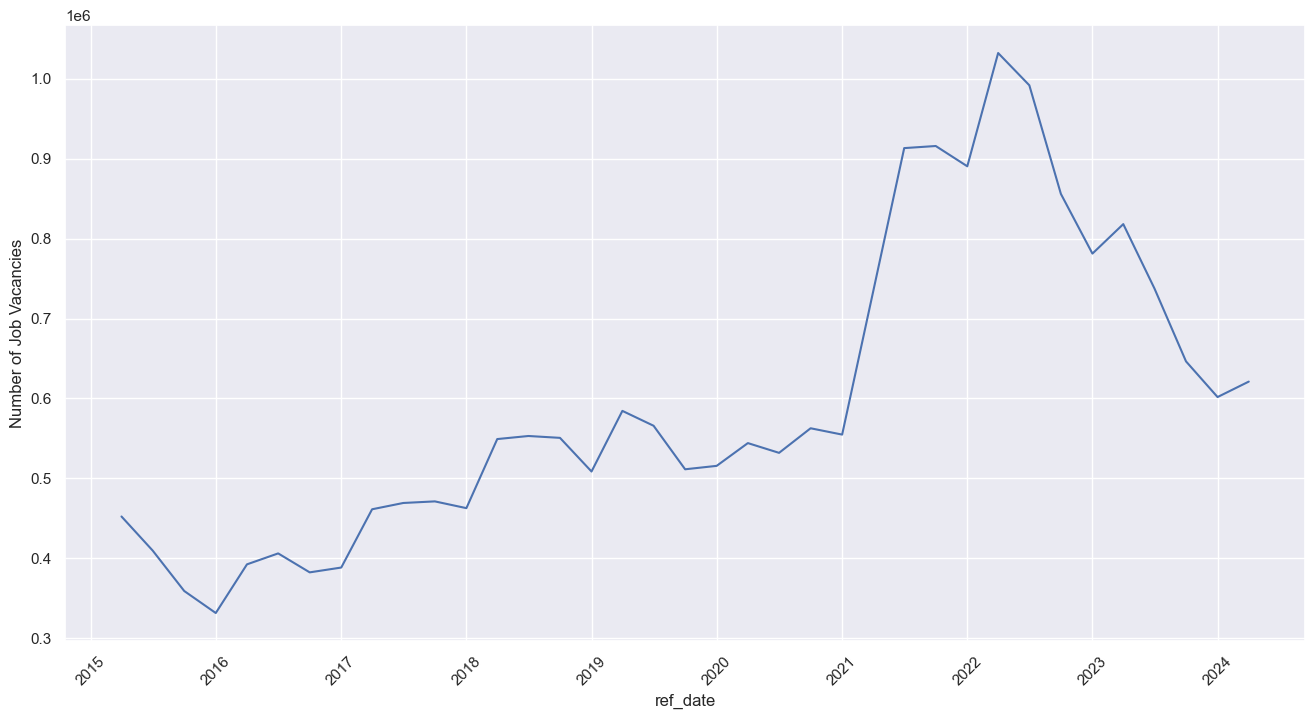

In [160]:
sns.lineplot(data= df, x='ref_date', y= 'total_vacancies')
plt.ylabel('Number of Job Vacancies')
plt.xticks(rotation=45)

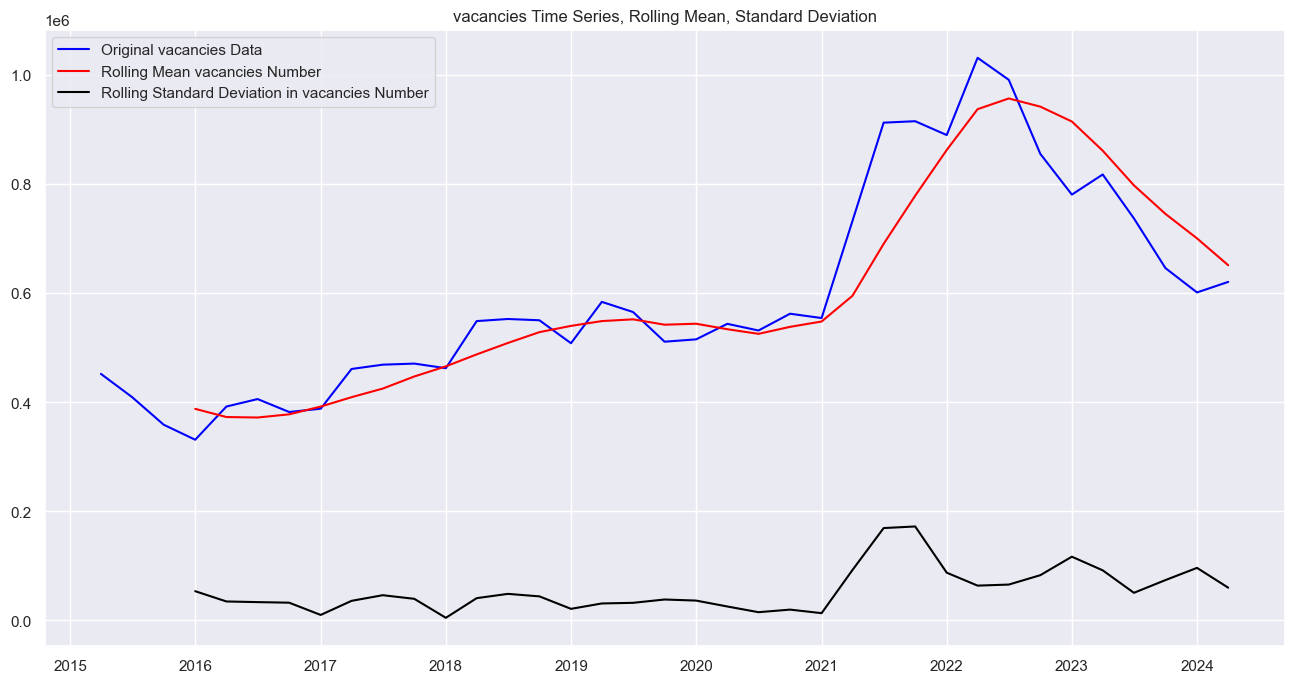

In [161]:
'''check for stationary
A stationary time series will not have any trends or seasonal patterns
We will use the Dickey Fuller test to check for stationarity in our data '''

rolling_mean = df.rolling(4).mean()
rolling_std = df.rolling(4).std()

#First, let’s make a Matplotlib plot of our time series
plt.plot(df, color="blue",label="Original vacancies Data")
# then the rolling mean
plt.plot(rolling_mean, color="red", label="Rolling Mean vacancies Number")
#And finally, the rolling standard deviation:
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in vacancies Number")
#Let’s then add a title:
plt.title("vacancies Time Series, Rolling Mean, Standard Deviation")
#And a legend:
plt.legend(loc="best")

In [162]:
#We will use the Dickey Fuller test to check for stationarity in our data
from statsmodels.tsa.stattools import adfuller
df_test=df.iloc[:,0].values
adft = adfuller(df_test,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0  -1.414283              Test Statistics
1   0.575410                      p-value
2   8.000000             No. of lags used
3  28.000000  Number of observations used
4  -3.688926          critical value (1%)
5  -2.971989          critical value (5%)
6  -2.625296         critical value (10%)


In [163]:
# Checking for autocorrelation in time series data
# This is a measure of how correlated time series data is at a given point in time with past values
autocorrelation_lag1 = df['total_vacancies'].autocorr(lag=1)
print("One Quarter Lag: ", autocorrelation_lag1)

autocorrelation_lag2 = df['total_vacancies'].autocorr(lag=2)
print("Two Quaretrs Lag: ", autocorrelation_lag2)

autocorrelation_lag3 = df['total_vacancies'].autocorr(lag=3)
print("Three Quaretrs Lag: ", autocorrelation_lag3)

autocorrelation_lag4 = df['total_vacancies'].autocorr(lag=4)
print("Four Quaretrs Lag: ", autocorrelation_lag4)

One Quarter Lag:  0.9356456458757408
Two Quaretrs Lag:  0.8389214506563186
Three Quaretrs Lag:  0.7626014962567855
Four Quaretrs Lag:  0.666631597594131


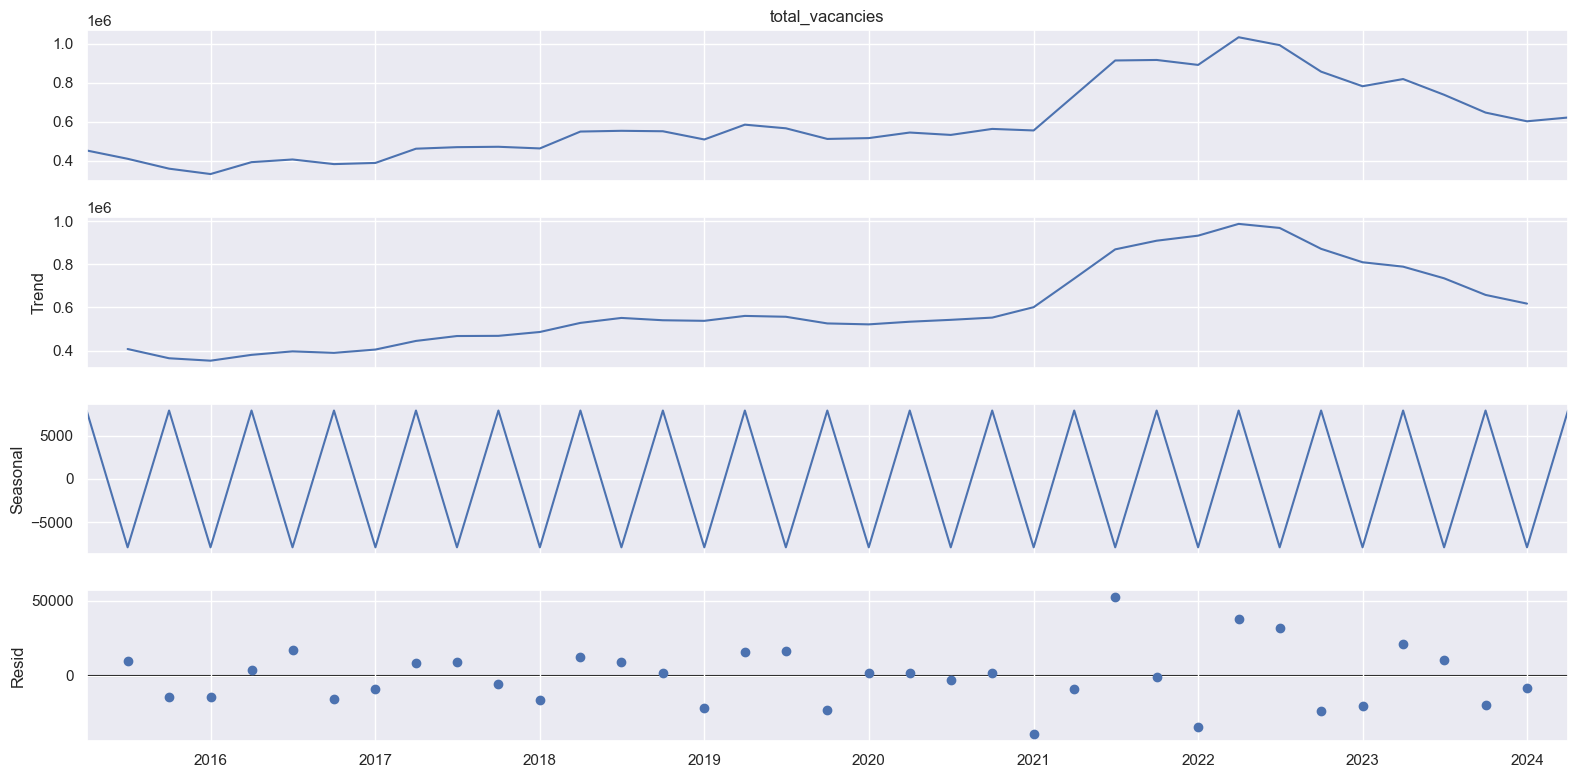

In [164]:
#Check for Trend decomposition is another useful way to visualize the trends in time series data
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['total_vacancies'],model='additive', period=2)
decompose.plot()
plt.show()

C:\Users\Gurmanjit\AppData\Local\Temp\ipykernel_15628\1618480039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['total_vacancies']
C:\Users\Gurmanjit\AppData\Local\Temp\ipykernel_15628\1618480039.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['total_vacancies']


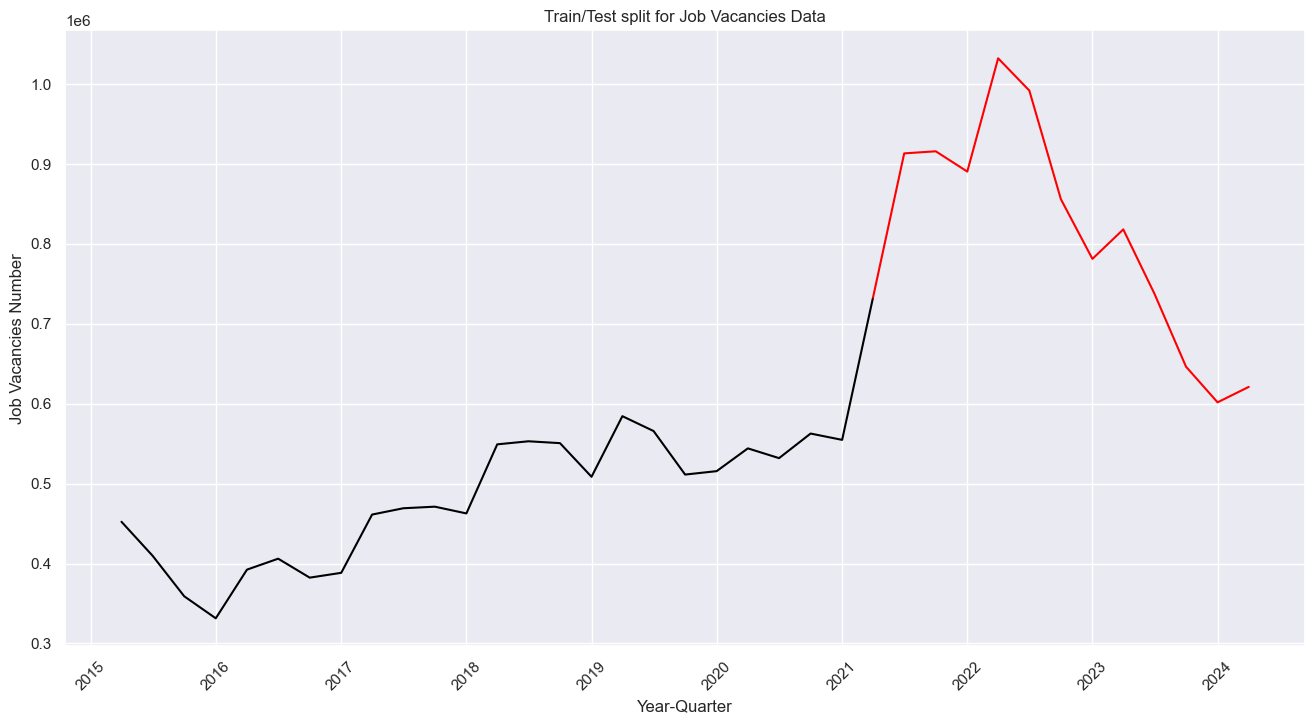

In [165]:
# Forescasting
df['ref_date']=df.index
train = df[df['ref_date'] <= "2021-04-01"]
train['train'] = train['total_vacancies']
del train['ref_date']
del train['total_vacancies']

test = df[df['ref_date'] > "2021-04-01"]
del test['ref_date']
test['test'] = test['total_vacancies']
del test['total_vacancies']

plt.plot(train, color = "black")
plt.plot(pd.concat([train.tail(1).rename({"train":"test"},axis='columns'),test]), color = "red")
plt.title("Train/Test split for Job Vacancies Data")
plt.ylabel("Job Vacancies Number")
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
sns.set()
plt.show()

In [166]:
# code to connect train and split data for the plot above
pd.concat([train.tail(1).rename({"train":"test"},axis='columns'),test])

,test
ref_date,
2021-04-01,732815.0
2021-07-01,913250.0
2021-10-01,915875.0
2022-01-01,890495.0
2022-04-01,1032215.0
2022-07-01,991835.0
2022-10-01,855965.0
2023-01-01,781250.0
2023-04-01,818135.0


#SARIMAX

In [167]:
# Register converters to avoid warnings
pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [168]:
# Dataset
data = df
data.index = data.ref_date
# Set the frequency
data.index.freq="QS-OCT"

# Fit the model (configuration is set using previous autocorreleation, trend decomposition tests)
mod = sm.tsa.statespace.SARIMAX(train, trend='t', order=(1,0,1),seasonal_order=(1, 1, 1, 2))
res = mod.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             train   No. Observations:                   25
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 2)   Log Likelihood                -275.648
Date:                           Fri, 22 Nov 2024   AIC                            563.295
Time:                                   14:16:28   BIC                            570.108
Sample:                               04-01-2015   HQIC                           565.009
                                    - 04-01-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       2777.1818   5.38e-05   5.17e+07      0.000    2777.182    2777.182
ar.L1         -0.6767      0.310     -2.185

C:\Users\Gurmanjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Gurmanjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Gurmanjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Gurmanjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizati

In [169]:
forecast = res.predict(test.index[0],test.index[-1], dynamic=True)
forecast = pd.DataFrame(forecast.values,index = test.index,columns=['predicted_vacancies'])
forecast.head()

,predicted_vacancies
ref_date,
2021-07-01,646450.643126
2021-10-01,691214.129175
2022-01-01,638991.631442
2022-04-01,753597.980306
2022-07-01,712920.509958


In [170]:
# create dataframe for results
output = test.merge(forecast, how='inner', left_index=True, right_index=True)
output.head()

,test,predicted_vacancies
ref_date,,
2021-07-01,913250.0,646450.643126
2021-10-01,915875.0,691214.129175
2022-01-01,890495.0,638991.631442
2022-04-01,1032215.0,753597.980306
2022-07-01,991835.0,712920.509958


In [171]:
#Evaluating SARIMA model

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,explained_variance_score,r2_score

evs = explained_variance_score(output.test,output.predicted_vacancies,multioutput='uniform_average')
print(f'Explained Variance Score : {evs}')
mse = mean_squared_error(output.test,output.predicted_vacancies, squared=False)
print(f'Mean Square Error : {mse}')
mape = mean_absolute_percentage_error(output.test,output.predicted_vacancies, multioutput='uniform_average')
print(f'Mean Absolute Percentage Error : {mape}')
rsqr =r2_score(output.test,output.predicted_vacancies,multioutput='uniform_average')
print(f'Coefficient of determination Training (R^2) : {rsqr}')

Explained Variance Score : -0.7378061526823023
Mean Square Error : 197029.6058422882
Mean Absolute Percentage Error : 0.21264155296355566
Coefficient of determination Training (R^2) : -1.077222169936383


C:\Users\Gurmanjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


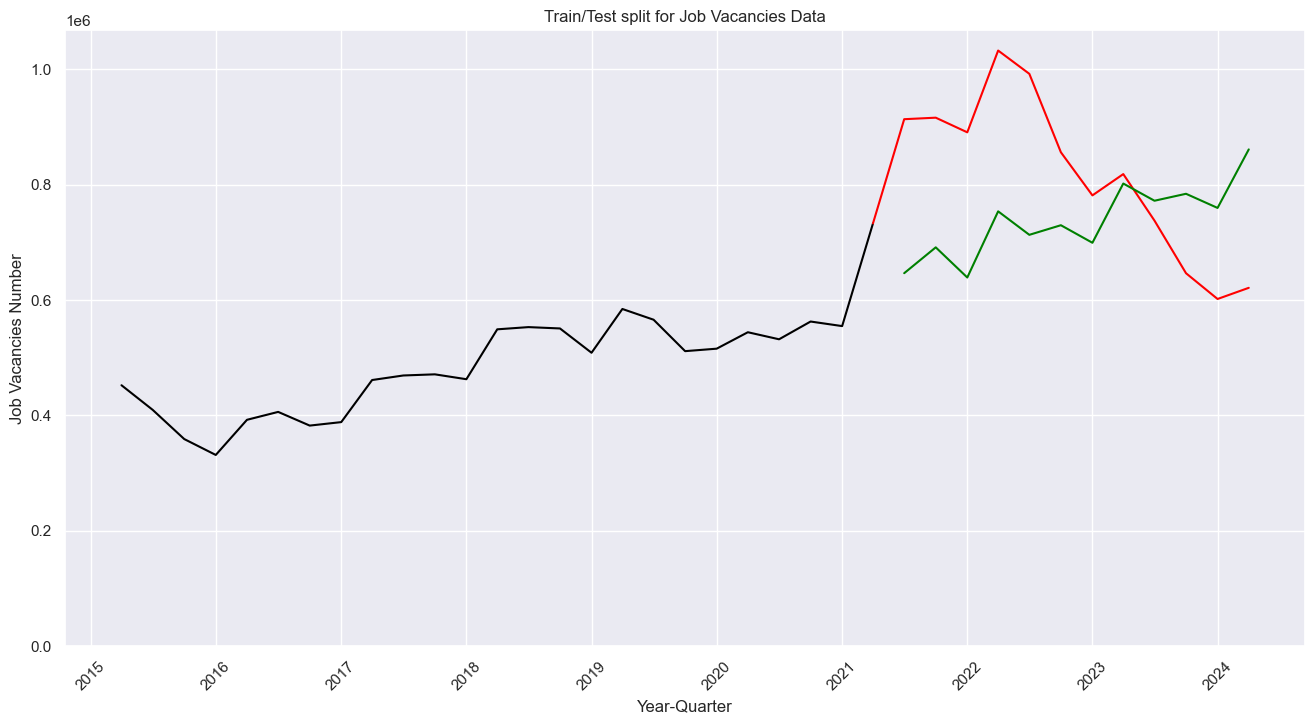

In [172]:
#visualize results
plt.plot(train, color = "black")
plt.plot(pd.concat([train.tail(1).rename({"train":"test"},axis='columns'),test]), color = "red")
plt.plot(forecast['predicted_vacancies'],color= 'green')
plt.title("Train/Test split for Job Vacancies Data")
plt.ylabel("Job Vacancies Number")
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
plt.ylim(ymin=0)
sns.set()
plt.show()

CHATGPT

In [46]:
# Import auto_arima from pmdarima
from pmdarima import auto_arima

# After trend decomposition, before fitting the SARIMAX model
# Fit the auto_arima model
model = auto_arima(df['total_vacancies'], seasonal=True, m=4, stepwise=True, trace=True)

# Show the summary of the fitted model
model.summary()

# Optionally, you can forecast using the fitted auto_arima model
forecast_arima = model.predict(n_periods=len(test))
forecast_arima = pd.DataFrame(forecast_arima, index=test.index, columns=['predicted_vacancies'])

# You can now compare the ARIMA forecast with the SARIMAX forecast
output_arima = test.merge(forecast_arima, how='inner', left_index=True, right_index=True)
output_arima.head()

# Evaluate and visualize the ARIMA model's performance
evs_arima = explained_variance_score(output_arima.test, output_arima.predicted_vacancies, multioutput='uniform_average')
print(f'Explained Variance Score (ARIMA): {evs_arima}')
mse_arima = mean_squared_error(output_arima.test, output_arima.predicted_vacancies, squared=False)
print(f'Mean Square Error (ARIMA): {mse_arima}')
mape_arima = mean_absolute_percentage_error(output_arima.test, output_arima.predicted_vacancies, multioutput='uniform_average')
print(f'Mean Absolute Percentage Error (ARIMA): {mape_arima}')
rsqr_arima = r2_score(output_arima.test, output_arima.predicted_vacancies, multioutput='uniform_average')
print(f'Coefficient of determination Training (R^2) for ARIMA: {rsqr_arima}')

# Visualize the ARIMA forecast results
plt.plot(train, color="black")
plt.plot(pd.concat([train.tail(1).rename({"train": "test"}, axis='columns'), test]), color="red")
plt.plot(forecast_arima['predicted_vacancies'], color='green')
plt.title("Train/Test split for Job Vacancies Data with ARIMA")
plt.ylabel("Job Vacancies Number")
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
plt.ylim(ymin=0)
sns.set()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=852.794, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=886.066, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=853.630, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=869.194, Time=0.04 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=885.678, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[4] intercept   : AIC=851.224, Time=0.16 sec
 ARIMA(2,0,2)(0,1,0)[4] intercept   : AIC=854.526, Time=0.04 sec
 ARIMA(2,0,2)(0,1,2)[4] intercept   : AIC=852.490, Time=0.16 sec
 ARIMA(2,0,2)(1,1,0)[4] intercept   : AIC=854.687, Time=0.07 sec
 ARIMA(2,0,2)(1,1,2)[4] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,2)(0,1,1)[4] intercept   : AIC=857.252, Time=0.07 sec
 ARIMA(2,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,0,2)(0,1,1)[4] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,0,3)(0,1,1)[4] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=847.794, Time=0.05 se

ValueError: Input contains NaN.

In [45]:
df['total_vacancies'] = df['total_vacancies'].fillna(df['total_vacancies'].mean())


In [47]:
df.isnull().sum()

total_vacancies    0
ref_date           0
dtype: int64

In [48]:
from pmdarima import auto_arima
import numpy as np

# Replace infinite values with NaN
df['total_vacancies'] = df['total_vacancies'].replace([float('inf'), float('-inf')], np.nan)

# Convert column to numeric and fill NaNs if needed
df['total_vacancies'] = pd.to_numeric(df['total_vacancies'], errors='coerce')
df['total_vacancies'] = df['total_vacancies'].fillna(method='ffill')

# Fit the auto_arima model
model = auto_arima(df['total_vacancies'], seasonal=True, m=4, stepwise=True, trace=True)

# Show the summary of the fitted model
model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=852.794, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=886.066, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=853.630, Time=0.03 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=869.194, Time=0.03 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=885.678, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[4] intercept   : AIC=851.224, Time=0.12 sec
 ARIMA(2,0,2)(0,1,0)[4] intercept   : AIC=854.526, Time=0.05 sec
 ARIMA(2,0,2)(0,1,2)[4] intercept   : AIC=852.490, Time=0.15 sec
 ARIMA(2,0,2)(1,1,0)[4] intercept   : AIC=854.687, Time=0.06 sec
 ARIMA(2,0,2)(1,1,2)[4] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,2)(0,1,1)[4] intercept   : AIC=857.252, Time=0.06 sec
 ARIMA(2,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,0,2)(0,1,1)[4] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,0,3)(0,1,1)[4] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=847.794, Time=0.05 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   37
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                -418.306
Date:                             Fri, 22 Nov 2024   AIC                            844.611
Time:                                     14:32:31   BIC                            850.597
Sample:                                 04-01-2015   HQIC                           846.625
                                      - 04-01-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -946.2424   7111.786     -0.133      0.894   -1.49e+04     1.3e+04
ar.L1          0.9630      0.159      6.074      0.000       0.652       1.274
ma.S.L4       -0.8441      0.250     -3.381      0.001      -1.333      -0.355
sigma2      5.149e+09      0.014   3.63e+11      0.000    5.15e+09    5.15e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.35   Prob(JB):                         0.50
Heteroskedasticity (H):               0.41   Skew:                            -0.09
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+27. Standard errors may be unstable.
"""

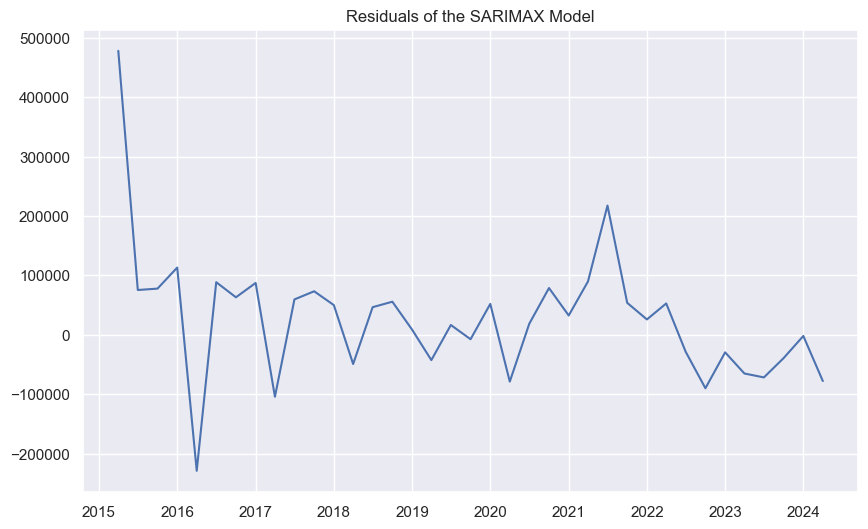

    lb_stat  lb_pvalue
1  0.287853     0.5916


In [49]:
residuals = model.resid()
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of the SARIMAX Model")
plt.show()

# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=[1], return_df=True)
print(ljung_box_test)


In [50]:
forecast_steps = 4  # Number of periods to forecast
forecast_values = model.predict(n_periods=forecast_steps)
forecast_df = pd.DataFrame(forecast_values, columns=["Forecast"], index=pd.date_range(start='2024-05-01', periods=forecast_steps, freq='Q'))

print(forecast_df)


            Forecast
2024-06-30       NaN
2024-09-30       NaN
2024-12-31       NaN
2025-03-31       NaN


In [52]:
forecast_values = model.predict(n_periods=forecast_steps)
forecast_steps = 4  # Number of periods to forecast
forecast_values = model.predict(n_periods=forecast_steps)

# Generate the forecast index (ensure it's quarterly)
forecast_index = pd.date_range(start='2024-06-30', periods=forecast_steps, freq='Q')

# Store the forecasted values in a DataFrame
forecast_df = pd.DataFrame(forecast_values, columns=["Forecast"], index=forecast_index)

print(forecast_df)
forecast_values = model.predict(n_periods=forecast_steps, exog=X_forecast)


            Forecast
2024-06-30       NaN
2024-09-30       NaN
2024-12-31       NaN
2025-03-31       NaN


NameError: name 'X_forecast' is not defined